In [1]:
print()

In [2]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Укажи путь до последнего event-файла (или директории логов)
logdir = "results/logs"

# Загружаем логи
ea = event_accumulator.EventAccumulator(logdir)
ea.Reload()

# Доступные скаляры
scalars = ea.Tags()["scalars"]
print("📊 Scalars:", scalars)

2025-06-13 02:50:35.702947: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-13 02:50:38.686254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-13 02:50:47.208908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


📊 Scalars: ['train/loss', 'train/learning_rate', 'train/epoch', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']


In [4]:
# Вытащим train/loss
loss_data = ea.Scalars("train/loss")
steps = [e.step for e in loss_data]
loss_values = [e.value for e in loss_data]

/tmp/ipykernel_2625/819809929.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("train_loss.png")
/tmp/ipykernel_2625/819809929.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("train_loss.png")
/tmp/ipykernel_2625/819809929.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("train_loss.png")
/kernel/lib/python3.10/site-packages/ml_kernel/_vendor/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/kernel/lib/python3.10/site-packages/ml_kernel/_vendor/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


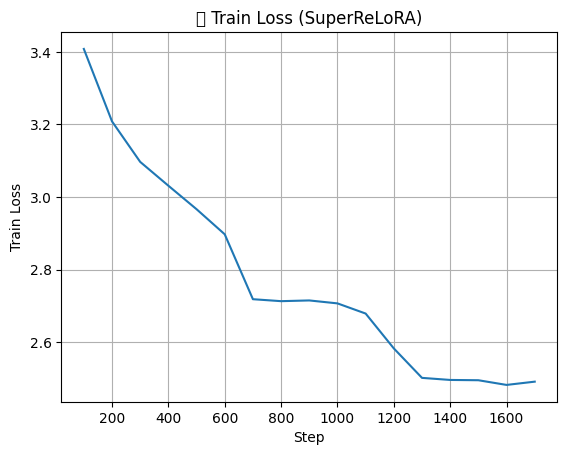

In [5]:
# Построим график
plt.plot(steps, loss_values)
plt.xlabel("Step")
plt.ylabel("Train Loss")
plt.title("📉 Train Loss (SuperReLoRA)")
plt.grid(True)
plt.savefig("train_loss.png")
plt.show()

In [6]:
# Сохраняем финальные метрики
final_metrics = {
    "Final Train Loss": loss_values[-1],
    "Final Step": steps[-1],
    "Min Train Loss": min(loss_values),
    "Max Train Loss": max(loss_values),
    "Num Steps": len(loss_values)
}

# Таблица в pandas
df = pd.DataFrame(list(final_metrics.items()), columns=["Метрика", "Значение"])
df.to_csv("metrics_summary.csv", index=False)
df


,Метрика,Значение
0,Final Train Loss,2.4918
1,Final Step,1700.0000
2,Min Train Loss,2.4828
3,Max Train Loss,3.4079
4,Num Steps,17.0000
